In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.optimize import curve_fit
plt.rcParams['text.usetex'] = True

In [185]:
def gauss(x, sigma):
    amp = 1 / (sigma * np.sqrt(2 * np.pi))
    return amp * np.exp(-0.5 * (x/sigma) ** 2)
def full_gauss(x, amp, x0, sigma):
    return amp * np.exp(-0.5 * ((x-x0)/sigma) ** 2)

In [186]:
# 1. Generate signal
N = 200
xlims = [-50,50]
x = np.linspace(xlims[0], xlims[1], N)
baseline = 0
noise_level = 0.1  # 10%
signal = baseline + noise_level * np.random.randn(N)

# Implant a Gaussian dip
true_amp = -2.3
true_pos = 14
true_width = 1

dip = full_gauss(x, true_amp, true_pos, true_width)
signal += dip


In [215]:
widths = np.linspace(0.5, 3, 20)  # Try different widths
# find the best fit
c = [ ]
mins = []
pos_indexes = []
for i in range(len(widths)):
    template = gauss(x, widths[i])  
    # zero mean the template
    template -= np.mean(template)
    # normalize the template
    template /= np.linalg.norm(template)
    # correlate the signal with the template
    corr = correlate(signal, template, mode='same')
    # find the minimum of the correlation
    pos_index = int(np.argmin(corr))
    minima = np.min(corr)
    mins.append(minima)
    pos_indexes.append(pos_index)
# Find the best width
best_template = np.argmin(mins)
# get the best position
best_width = widths[best_template]
best_pos = x[pos_indexes[best_template]]
best_pos
pos_indexes

[128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128]

Estimated position for width 0.50: 14.32
Estimated position for width 0.76: 14.32
Estimated position for width 1.03: 14.32
Estimated position for width 1.29: 14.32
Estimated position for width 1.55: 14.32
Estimated position for width 1.82: 14.32
Estimated position for width 2.08: 14.32
Estimated position for width 2.34: 14.32
Estimated position for width 2.61: 14.32
Estimated position for width 2.87: 14.32


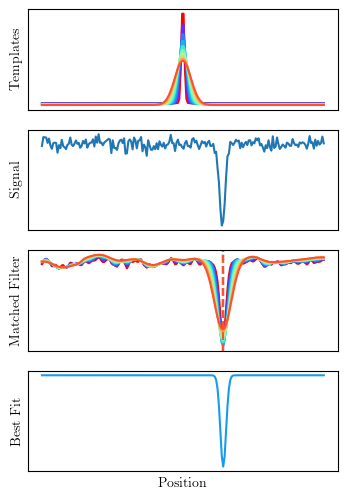

In [223]:
# Plotting
fig, axis = plt.subplots(4, 1, figsize=(4, 6),sharex=True)
axis[0].set_xticks([])
axis[0].set_yticks([])
x_template = np.linspace(xlims[0], xlims[1], N)
colors = plt.cm.rainbow(np.linspace(0, 1, widths.shape[0]))
for i in range(0,widths.shape[0],2):
    template = gauss(x_template, widths[i])  
    # make the template zero mean 
    template -= np.mean(template)  # Zero mean template
    # Normalize the template
    template /= np.linalg.norm(template)  # Normalize the template
    # normalize the template
    output= correlate(signal, template, mode='same')
    color = colors[i-1]
    pos_index = np.argmin(output)
    estimated_mu = x[pos_index]  # Position of the dip
    print(f"Estimated position for width {widths[i]:.2f}: {estimated_mu:.2f}")
    axis[0].plot(x_template, template ,  c=color, label=f'Width: {widths[i]:.2f}')
    line,=axis[2].plot(x, output, c=color,label=f'Width: {widths[i]:.2f}')
    axis[2].axvline(estimated_mu, color=color, linestyle='--', label=f'Estimated Position: {estimated_mu:.2f}')


axis[0].set_ylabel(r'$\textrm{Templates}$')
axis[2].set_ylabel(r'$\textrm{Matched Filter}$') 
axis[3].set_xlabel(r'$\textrm{Position}$')
axis[2].set_yticks([])
axis[1].plot(x, signal)
axis[1].set_ylabel(r'$\textrm{Signal}$')
axis[1].set_xticks([])
axis[1].set_yticks([])

# plot the best 
axis[3].plot(x, -full_gauss(x, 1, best_pos, best_width), color=colors[best_template],)
axis[3].set_ylabel(r'$\textrm{Best Fit}$')
axis[3].set_yticks([])
axis[3].set_xlabel(r'$\textrm{Position}$')
fig.savefig("../../tempImages//matched_filter_example.png", dpi=300, bbox_inches='tight')

In [217]:

# # 3. Matched filter (cross-correlation)
# matched_filter_output = correlate(signal, template, mode='same')

# # 4. Find position, amplitude, width
# peak_idx = np.argmin(matched_filter_output)  # dip gives negative peak
# estimated_pos = peak_idx

# # Fit a Gaussian to the matched filter output near the peak
# fit_range = 10
# fit_x = np.arange(estimated_pos - fit_range, estimated_pos + fit_range + 1)
# fit_y = matched_filter_output[estimated_pos - fit_range:estimated_pos + fit_range + 1]


# popt, _ = curve_fit(neg_gauss, fit_x, fit_y, p0=[-1, estimated_pos, template_width, 0])

# estimated_amp, estimated_mu, estimated_sigma, _ = popt

# print(f"Estimated amplitude: {estimated_amp:.2f}")
# print(f"Estimated position: {estimated_mu:.2f}")
# print(f"Estimated width: {np.abs(estimated_sigma):.2f}")



ValueError: x and y must have same first dimension, but have shapes (10000,) and (1000,)

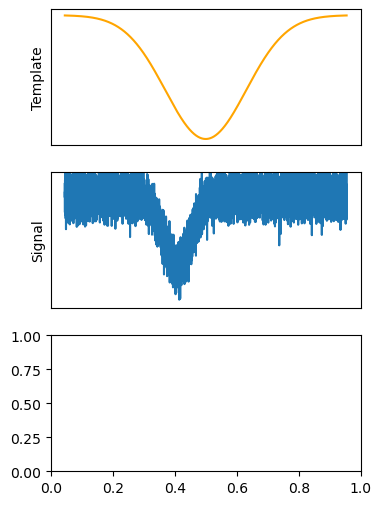

In [75]:
# Plotting
fig, axis = plt.subplots(3, 1, figsize=(4, 6))
axis[1].plot(x, signal)
axis[1].set_ylabel('Signal')
axis[1].set_xticks([])
axis[1].set_yticks([])
axis[1].set_ylim(0,1.2)

axis[0].plot(template, color='orange')
axis[0].set_ylabel('Template')
axis[0].set_xticks([])
axis[0].set_yticks([])

axis[2].plot(x,matched_filter_output, color='green')
# axis[2].axvline(estimated_mu, color='red', linestyle='--', label='Estimated Position')
# axis[2].set_title('Matched Filter Output')
# axis[2].legend()

# plt.tight_layout()
# plt.show()